# Evaluating dimensionality reduction methods on simulated data

## Generate Synthetic Data with Known Ground Truth

### Introduction to Splatter

Splatter, [Zappia L, et al. Genome Biology. 2017](https://doi.org/10.1186/s13059-017-1305-0), is a tool for simulating single-cell RNA-sequencing data with a known topology. Splatter has two main modes: "paths" and "groups." Because we're interested in generating data with a known trajectory structure, we are going to use the `paths` mode.

Splatter has a bunch of other parameters you can choose from, and if you have time, feel free to play around with the various options.



In [ ]:
!pip install --user scprep phate

### Imports

In [10]:
import scprep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In order to save time, we've precompiled all the necessary R packages. You can download and install them by running the code below. If you were running this without precompiled packages, you could install Splatter by running the following code:

```python
import scprep
scprep.run.splatter.install()
```

In [5]:
scprep.io.download.download_google_drive('1VuddKA7Xa23NAFKvRUmtuND16eEMHL9z',
                                         '/content/r_packages.tar.gz')
!tar xzf /content/r_packages.tar.gz && rm /content/r_packages.tar.gz
!apt-get install -yqq libgsl-dev=2.4+dfsg-6
!pip install --user --upgrade rpy2
!echo "R_LIBS_USER='/content/.r_packages'" >> ~/.Renviron

FileNotFoundError: [Errno 2] No such file or directory: '/content/r_packages.tar.gz'

### Generating simulated data

Unfortunately, Splatter is only implemented in R. Fortunately, we provide a wrapper in the `scprep.run` module. You can call Splatter from Python using [`scprep.run.SplatSimulate()`](https://scprep.readthedocs.io/en/stable/reference.html#scprep.run.SplatSimulate).

In [6]:
sim = scprep.run.SplatSimulate(method='paths', batch_cells=3000, 
                               path_from=[0, 0, 1, 1, 2, 2], group_prob=[0.1, 0.2, 0.3, 0.2, 0.1, 0.1])

R[write to console]: Getting parameters...
R[write to console]: Creating simulation object...
R[write to console]: Simulating library sizes...
R[write to console]: Simulating gene means...
R[write to console]: Simulating path endpoints...
R[write to console]: Simulating path steps...
R[write to console]: Simulating BCV...
R[write to console]: Simulating counts...
R[write to console]: Simulating dropout (if needed)...
R[write to console]: Done!


In [7]:
data_sim = scprep.normalize.library_size_normalize(sim['counts'])

In [8]:
data_sim = scprep.transform.sqrt(data_sim)

### Exercise - run PCA, t-SNE, UMAP and PHATE on the simulated data

In [9]:
# # Run PCA to 100 components
# data_pca = ???
# # Run t-SNE on the PCA
# data_tsne = ???
# # Run UMAP on the PCA
# data_umap = ???
# # Run PHATE on the PCA
# data_phate = ???

# Run PCA to 100 components
data_pca = scprep.reduce.pca(data_sim, n_components=100)
# Run t-SNE on the PCA
data_tsne = sklearn.manifold.TSNE().fit_transform(data_pca)
# Run UMAP on the PCA
data_umap = umap.UMAP().fit_transform(data_pca)
# Run PHATE on the PCA
data_phate = phate.PHATE().fit_transform(data_pca)

NameError: name 'sklearn' is not defined

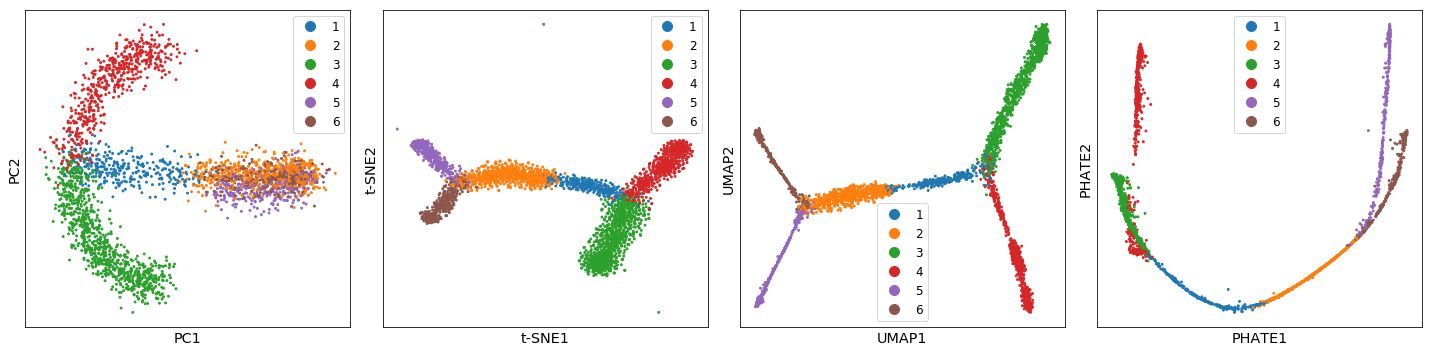

In [26]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
scprep.plot.scatter2d(data_pca, c=sim['group'], ax=axes[0],
                     ticks=False, label_prefix="PC")
scprep.plot.scatter2d(data_tsne, c=sim['group'], ax=axes[1],
                     ticks=False, label_prefix="t-SNE")
scprep.plot.scatter2d(data_umap, c=sim['group'], ax=axes[2],
                     ticks=False, label_prefix="UMAP")
scprep.plot.scatter2d(data_phate, c=sim['group'], ax=axes[3],
                     ticks=False, label_prefix="PHATE")
plt.tight_layout()

Notice that t-SNE, UMAP and PHATE all successfully capture the branch structure, while PCA collapses multiple branches on top of each other. Discuss why this may be with your group.

### Exercise - exploring different data structures

In pairs, determine a set of parameters for each of the following conditions
1. Datasets that look good on all four visualizations
2. Datasets that look bad for at least two of the visualizations
3. Datasets that look bad for all of the visualizations

Can you figure out the best way to "break" each method?

You can see the possible simulation parameters you can tune using `help(scprep.run.SplatSimulate)` or reading the [`scprep.run` documentation](https://scprep.readthedocs.io/en/stable/reference.html#module-scprep.run.splatter) online.

In [27]:
help(scprep.run.SplatSimulate)

Help on function SplatSimulate in module scprep.run.splatter:

SplatSimulate(method='paths', batch_cells=100, n_genes=10000, batch_fac_loc=0.1, batch_fac_scale=0.1, mean_rate=0.3, mean_shape=0.6, lib_loc=11, lib_scale=0.2, lib_norm=False, out_prob=0.05, out_fac_loc=4, out_fac_scale=0.5, de_prob=0.1, de_down_prob=0.1, de_fac_loc=0.1, de_fac_scale=0.4, bcv_common=0.1, bcv_df=60, dropout_type='none', dropout_prob=0.5, dropout_mid=0, dropout_shape=-1, group_prob=1, path_from=0, path_length=100, path_skew=0.5, path_nonlinear_prob=0.1, path_sigma_fac=0.8, seed=None, verbose=1)
    Simulate count data from a fictional single-cell RNA-seq experiment using the Splat method.
    
    SplatSimulate is a Python wrapper for the R package Splatter. For more
    details, read about Splatter  on [GitHub](https://github.com/Oshlack/splatter)
    and [Bioconductor](https://bioconductor.org/packages/release/bioc/html/splatter.html).
    
    Parameters
    ----------
    batch_cells : list-like or int, o